# Assignment 3.1: Eigenmodes

This code runs part 3.1 of Assignment 3: Eigenmodes of drums or membranes of different shapes

In [1]:
from src.diagonal_matrix import diagonal_matrix, visualize_diag_matrix, visualize_multiple_modes, get_eigenmodes

### 1.1 Matrix of eigenvalue problem

The following function creates a diagonal Matrix for the eigenvalue problem with Dirichlet boundary conditions.

In [2]:
# The length of the system matrix
length = 4

diag_M = diagonal_matrix(length)

print(diag_M)

[[-4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -4.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  1. -4.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0. -4.  1.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0. -4.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4. 

Note: It may not be visible on the output, but the 4th position from (-4) in either direction contains a 1 such that: [..., 0, 1, 0, 0, 1, -4, 1, 0, 0, 1, 0, ...]. Except for the boundary, each row/column will contain 5 entries, alligning with the 5-point-stencil. 

We can visualize this matrix with the following function. Note that for larger values of N, you should pass the parameter text='OFF'. 

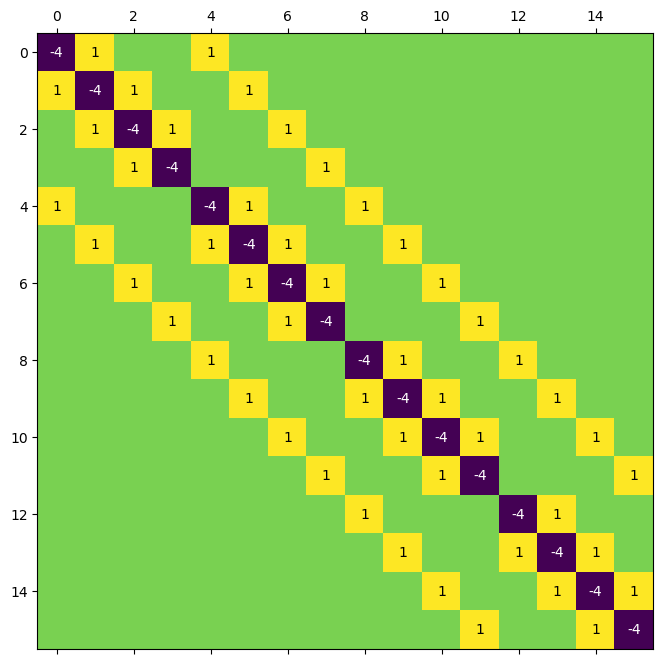

In [3]:
fig = visualize_diag_matrix(diag_M, length)

### Eigenmodes

We can now get and visualise the eigenmodes with the following function. We will take a larger matrix to better visualise it. Note that high values for N and multiple modes will take longer to run.

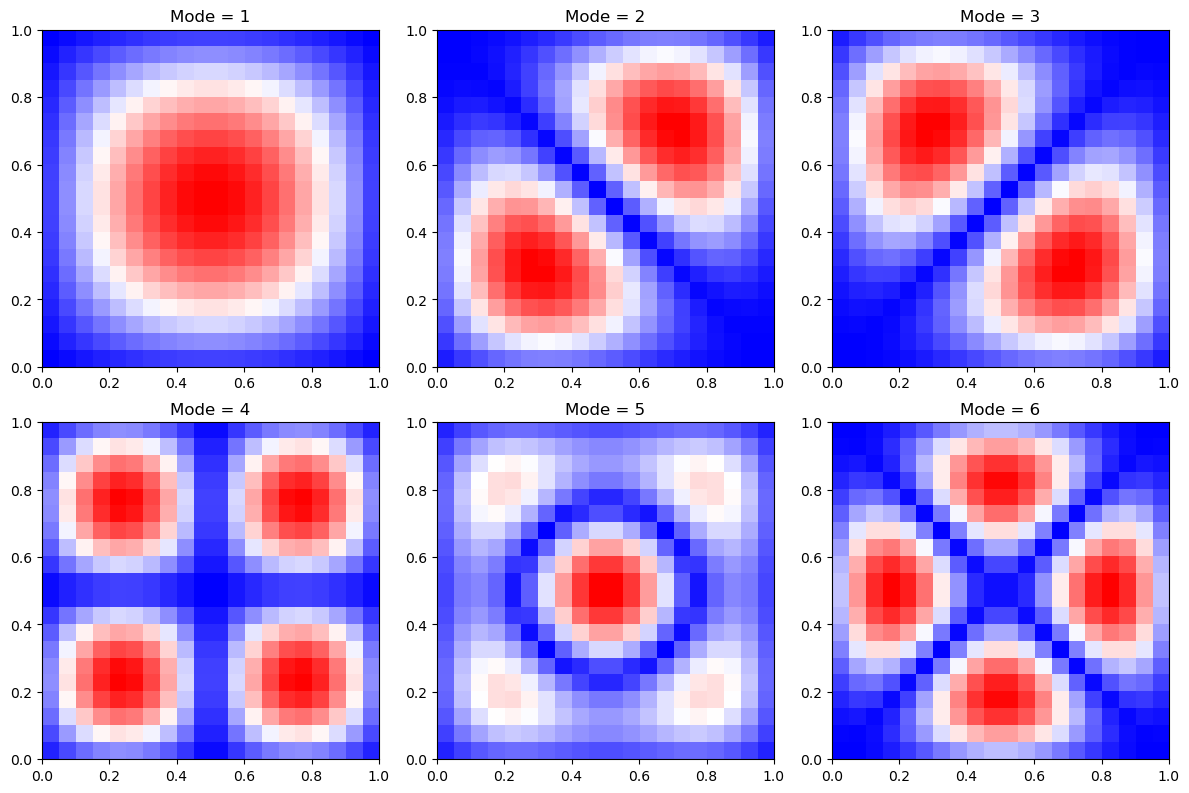

In [ ]:
# Number of modes to display
modes = 6
length = 50

diag_M = diagonal_matrix(length)

eigenmodes = get_eigenmodes(diag_M, length, modes)
visualize_multiple_modes(eigenmodes, length, modes)
